<a href="https://colab.research.google.com/github/StressTestModel/balanceSheetsAssetPrices/blob/main/StressTestingDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/StressTestModel/balanceSheetsAssetPrices/main/BankBalanceSheetData.csv")
df.describe()

,Slope,Level,UR,CRE Price moment,DJI Price Momentum,VIX,SAVINGS_PCH,TOTCI_growth,CORCREXFACBN
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.752069,3.333069,5.842241,4.123329,9.503096,25.775000,2.071231,1.118637,0.530862
std,1.148465,2.010369,1.632664,9.457557,16.377466,10.609248,1.689686,2.323289,0.787552
min,-0.770000,0.554000,3.500000,-30.030422,-39.444900,12.700000,-4.437100,-8.160774,-0.030000
25%,0.805000,1.413500,4.600000,0.000000,1.123283,18.900000,1.268193,-0.360169,0.040000
50%,1.885000,3.153000,5.450000,4.680029,11.643855,22.600000,2.024345,1.673738,0.115000
75%,2.682500,5.207500,6.825000,11.200732,18.947047,30.725000,2.945750,2.786051,0.690000
max,3.790000,7.248000,9.900000,23.018458,49.579821,80.900000,6.455440,7.212997,3.270000


Visualize the data, namely the key response variables

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

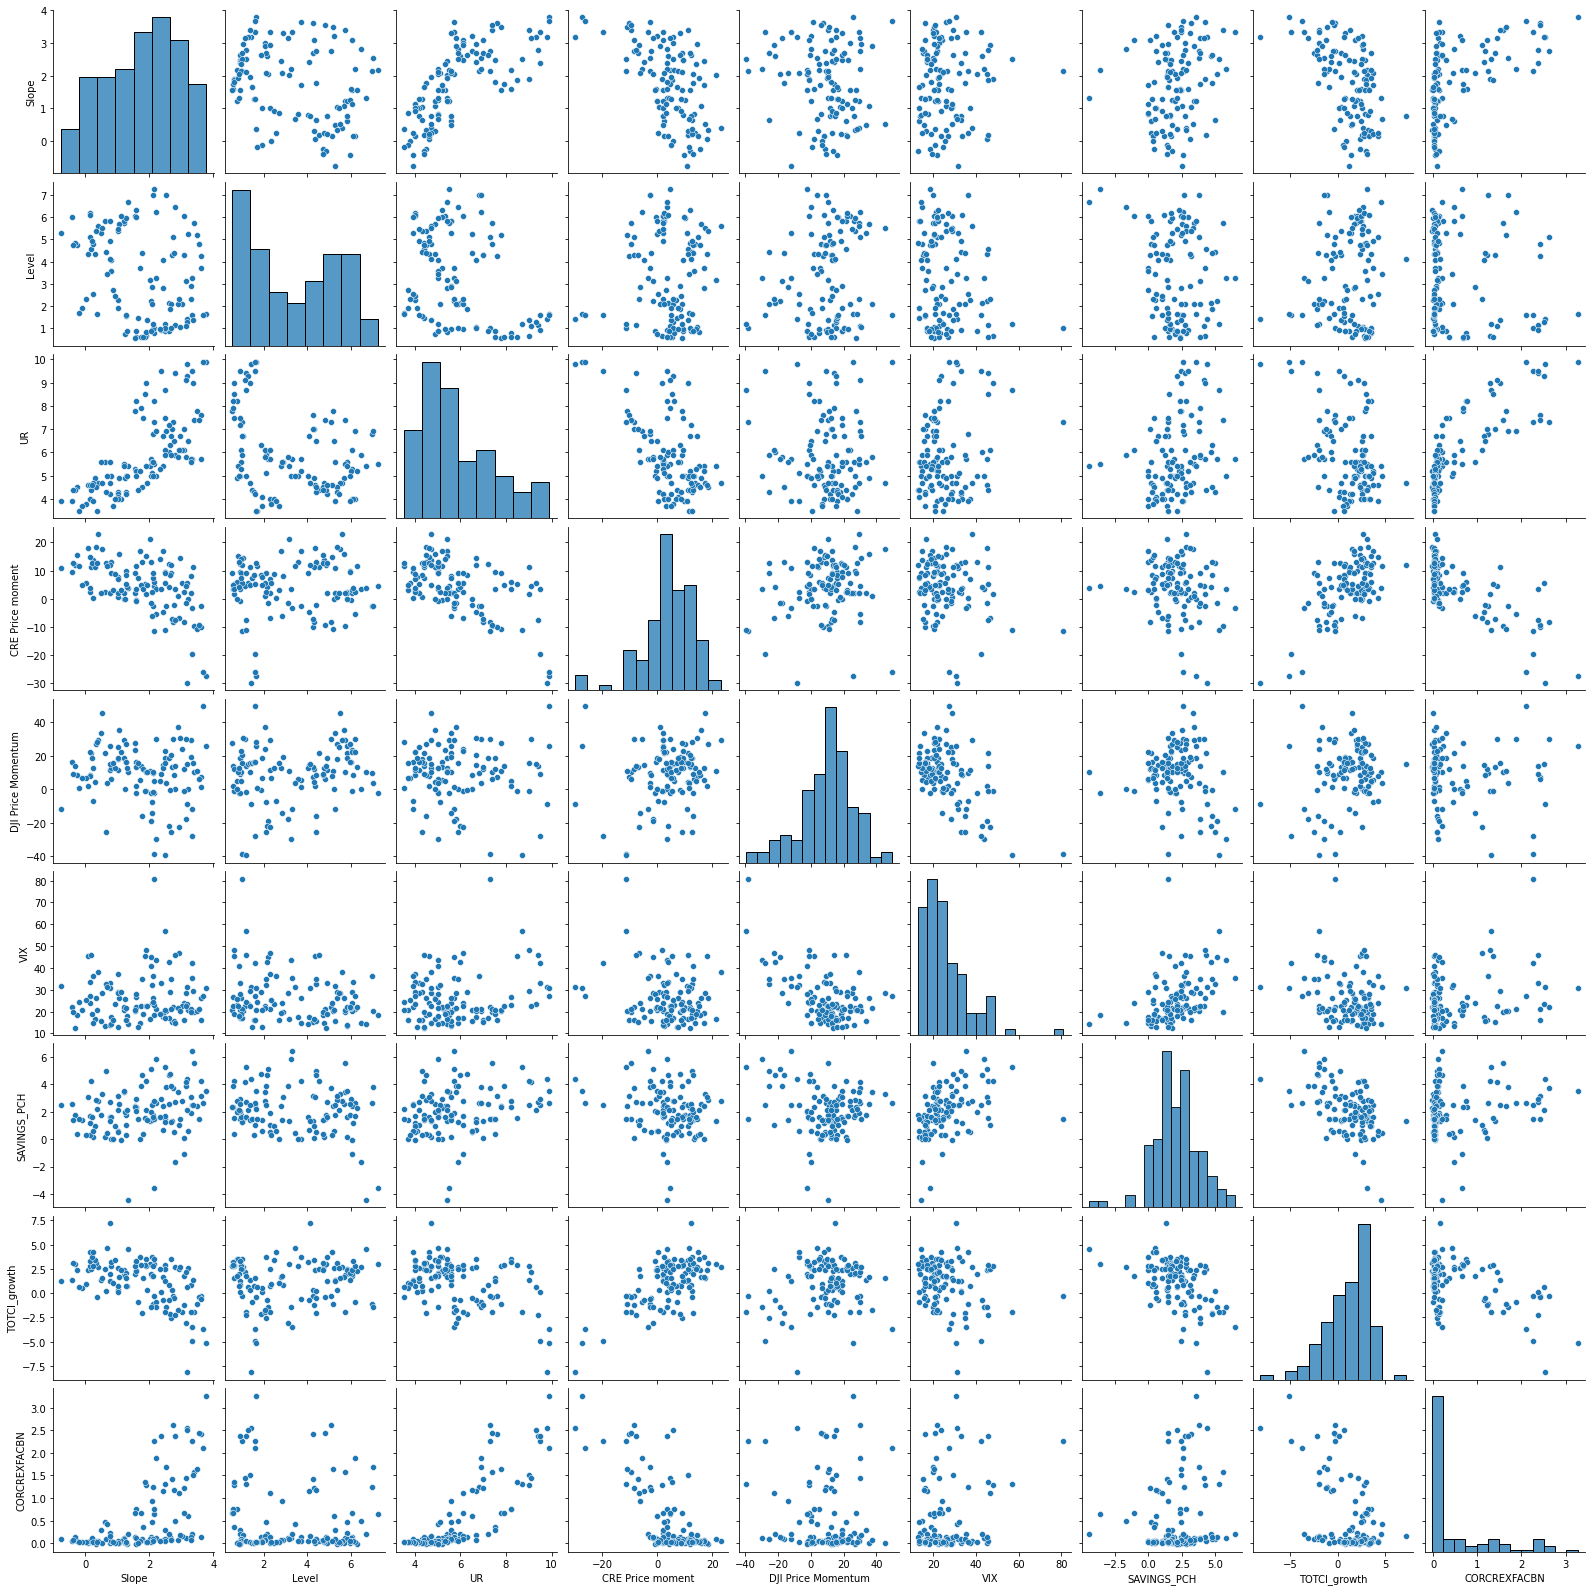

In [5]:
sns.pairplot(df)
sns.set_style("white")
sns.color_palette("Set2")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Savings Deposits (% Growth)')]

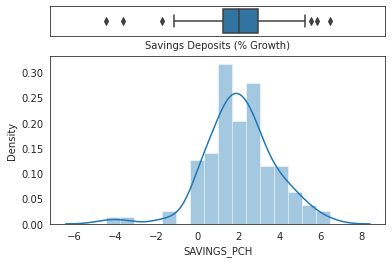

In [6]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df['SAVINGS_PCH'], ax=ax_box)
sns.distplot(df['SAVINGS_PCH'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='Savings Deposits (% Growth)')

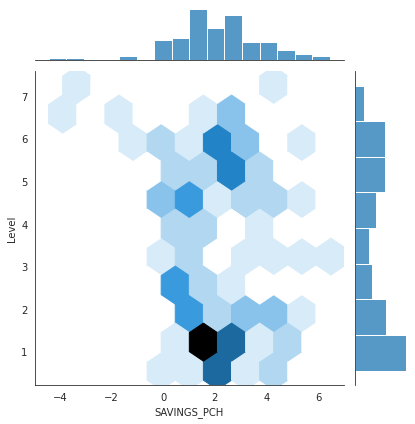

In [7]:
sns.jointplot(x=df["SAVINGS_PCH"], y=df["Level"], kind='hex')

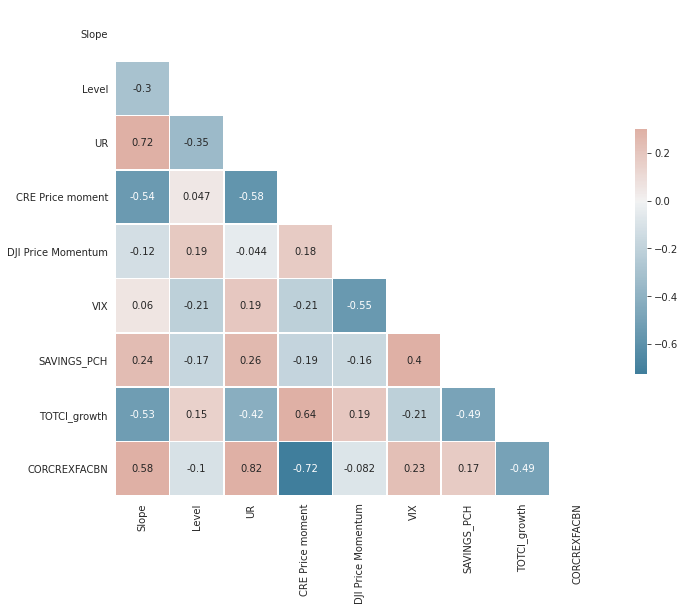

In [8]:
#sns.set_style("whitegrid")
sns.set_style("white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Text(0.5, 0, 'time (quarterly)')

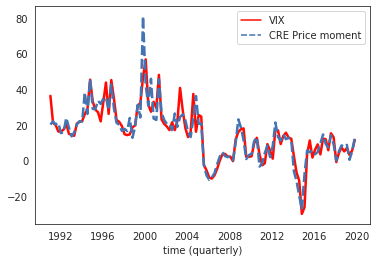

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

datesTS = pd.date_range(start = "1/1/1991", periods = 116, freq='3M')
#Convert into numpy array to build a pd dataframe
val = np.array([df["VIX"], df["CRE Price moment"]]).reshape(116,2)
datalineplot = pd.DataFrame(val, datesTS, columns =["VIX", "CRE Price moment"])
#sns.lineplot(data=dataTS, palette="tab10", linewidth=2.5)
g1 = sns.lineplot(data=datalineplot, linewidth=2.5)
#g1.set_ylabel('(%)')
g1.set_xlabel('time (quarterly)')

In [10]:
from string import ascii_letters
import seaborn as sns
STdf = df.loc[:, df.columns != 'observation_date']

STdfnp = np.array(STdf).reshape(116,9)
STdf.head()

,Slope,Level,UR,CRE Price moment,DJI Price Momentum,VIX,SAVINGS_PCH,TOTCI_growth,CORCREXFACBN
0,2.13,7.000,6.8,-2.583026,9.476096,36.2,2.65065,-1.097809,1.24
1,2.53,7.014,6.9,-2.697674,3.536386,20.1,3.79427,-1.416103,1.69
2,2.21,6.212,6.9,-5.607477,30.031605,21.2,2.60967,-0.912039,1.88
3,2.75,5.098,7.3,-8.442777,30.299220,21.9,3.77041,-0.343126,2.62
4,3.39,5.754,7.4,-9.659091,10.544967,19.8,5.55979,-1.961328,1.58


In [11]:
dates = pd.date_range(start = "1/1/1991", periods = 116, freq='3M')

dataST = pd.DataFrame(STdfnp, dates, columns = ["Slope","Level","UR", "CRE Price moment", "DJI Price Momentum", 
                                            "VIX","SAVINGS_PCH","TOTCI_growth","CORCREXFACBN"])

#dataST = pd.DataFrame(STdfnp, dates, columns = ["Slope","Level","UR", "CRE Price moment", "DJI Price Momentum","VIX"])

dataST.head()

,Slope,Level,UR,CRE Price moment,DJI Price Momentum,VIX,SAVINGS_PCH,TOTCI_growth,CORCREXFACBN
1991-01-31,2.13,7.000,6.8,-2.583026,9.476096,36.2,2.65065,-1.097809,1.24
1991-04-30,2.53,7.014,6.9,-2.697674,3.536386,20.1,3.79427,-1.416103,1.69
1991-07-31,2.21,6.212,6.9,-5.607477,30.031605,21.2,2.60967,-0.912039,1.88
1991-10-31,2.75,5.098,7.3,-8.442777,30.299220,21.9,3.77041,-0.343126,2.62
1992-01-31,3.39,5.754,7.4,-9.659091,10.544967,19.8,5.55979,-1.961328,1.58


Text(0.5, 0, 'time (quarterly)')

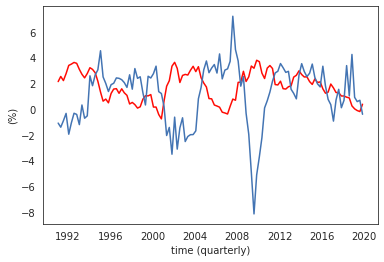

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style("white")
sns.lineplot(data=dataST["Slope"])
#sns.lineplot(data=dataST["CORCREXFACBN"])
g2 = sns.lineplot(data=dataST["TOTCI_growth"])
g2.set_ylabel('(%)')
g2.set_xlabel('time (quarterly)') 

Before going ahead with the model development process, it is important to recognize the purpose of stress testing and related activities. Stress testing refers to exercises used to conduct a forward-looking assessment of the potential impact of various adverse events and circumstances on a banking organization. 

"An effective stress testing framework provides a comprehensive, integrated, and forward-looking set of activities for a banking organization to employ along with other practices in order to assist in the identification and measurement of its material risks and vulnerabilities, including those that may manifest themselves during stressful economic or financial environments, or arise from firm-specific adverse events." - **SR Letter 12-7 "Guidance on Stress Testing for Banking Organizations with Total Consolidated Assets of More than $10 Billion"**